In [2]:
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
from nilearn import plotting
import numpy as np

In [6]:
# load behavioral data
subj01 = pd.read_csv("/home/jovyan/shared/NSD/nsddata/ppdata/subj01/behav/responses.tsv",sep="\t")
subj01.isna()

,SUBJECT,SESSION,RUN,TRIAL,73KID,10KID,TIME,ISOLD,ISCORRECT,RT,CHANGEMIND,MEMORYRECENT,MEMORYFIRST,ISOLDCURRENT,ISCORRECTCURRENT,TOTAL1,TOTAL2,BUTTON,MISSINGDATA
0,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
# loading MNI space data
beta_ss1 = nib.load("/home/jovyan/shared/NSD/nsddata_betas/ppdata/subj01/MNI/betas_fithrf/betas_session01.nii.gz")
brainmask = nib.load("/home/jovyan/shared/NSD/nsddata_betas/ppdata/subj01/MNI/betas_fithrf/valid_session01.nii.gz")
mask = brainmask.get_fdata()

MTLmask = nib.load("/home/jovyan/lh.MTL.nii.gz")
MTL = MTLmask.get_fdata()

anat_T1 = nib.load("./T1_to_MNI.nii.gz") # loading from the current directory
anat_data = anat_T1.get_fdata()

In [12]:
data = beta_ss1.slicer[:, :, :, 0].get_fdata()/300 # extract the first trial of this session's beta map
data_brainmasked = np.multiply(mask,data)

In [13]:
print("brainmask dimension:",mask.shape)
print(data_brainmasked.shape)
print(MTL.shape)

brainmask dimension: (182, 218, 182)
(182, 218, 182)
(320, 320, 320)


In [14]:
data_brainmasked.shape

(182, 218, 182)

In [19]:
def show_slices(slices):
   """ Function to display row of image slices """
   fig, axes = plt.subplots(1, len(slices))
   for i, slice in enumerate(slices):
       axes[i].imshow(slice.T, cmap="gray", origin="lower")

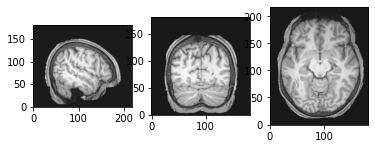

In [20]:
# A quick look of the anatomical: load the T1_MNI of subject 01
show_slices([anat_data[40, :, :],
             anat_data[:, 50, :],
             anat_data[:, :, 60]])

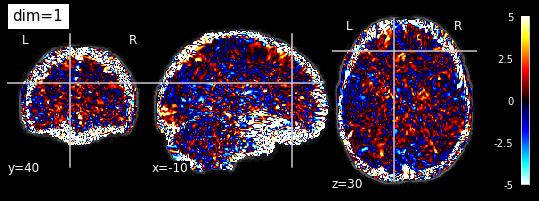

In [16]:
# Overlay single trial's beta with the participant's T1 in MNI
plotting.plot_stat_map(nib.Nifti1Image(data_brainmasked, beta_ss1.affine), # this function needs a 3D data file
                       bg_img="/home/jovyan/T1_to_MNI.nii.gz", # the anatomical background
                       cut_coords=(-10, 40, 30), 
                       threshold=0, title="dim=1",
                       dim=1,vmax=5)

In [48]:
print(np.unique(mask))

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


In [73]:
mask_cor = np.where(mask==1)
mask_r1 = beta_t1[mask_cor[0],mask_cor[1],mask_cor[2]]

(102,)